In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [5]:
most_recent_date = most_recent_date = df.iloc[-1]['date']
most_recent_date

'2021-03-26'

In [30]:
total_cases = df[['date', 'location', 'total_cases', 'total_deaths']]
total_cases = total_cases.loc[total_cases['date'] == most_recent_date]
total_cases = total_cases.sort_values(by='total_cases', ascending=False)
total_cases = total_cases.drop(total_cases.index[[0, 1, 4, 5, 6]]) # not countries

most_affected_countries = total_cases[1:11]
most_affected_countries

,date,location,total_cases,total_deaths
73935,2021-03-26,United States,30156621.0,548087.0
10341,2021-03-26,Brazil,12404414.0,307112.0
32215,2021-03-26,India,11908910.0,161240.0
25743,2021-03-26,France,4526530.0,94432.0
57820,2021-03-26,Russia,4451565.0,95410.0
73505,2021-03-26,United Kingdom,4339157.0,126755.0
804,2021-03-26,Africa,4166617.0,111537.0
35093,2021-03-26,Italy,3488619.0,107256.0
65953,2021-03-26,Spain,3255324.0,75010.0
71837,2021-03-26,Turkey,3149094.0,30772.0


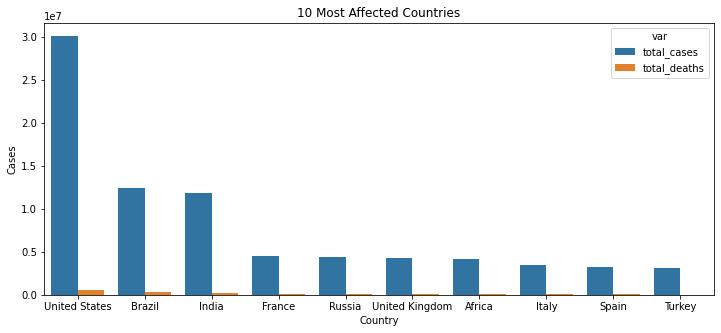

In [42]:
tidy = pd.melt(most_affected_countries, id_vars = ['location'],  value_vars=['total_cases', 'total_deaths'], 
               var_name='var', value_name='Cases')
plt.figure(figsize=(12, 5))
sns.barplot(x="location", hue="var", y="Cases", data=tidy)
plt.title('10 Most Affected Countries')
plt.xlabel('Country')
plt.show()